In [2]:
# Design State Feedback Control

import control
from control.matlab import ctrb, place

import numpy as np
from numpy.linalg import eig, matrix_rank
from scipy import integrate
import matplotlib.pyplot as plt

In [3]:
# Example : CCF

A = [[0, 1, 0], 
     [0, 0, 1],
     [-1, 1, 1]]

B = [[0], 
     [0],
     [1]]


In [4]:
# Compute eigenvalues, eigenvectors
w,v=eig(A)
print('eigenvalues:', w)
#print('eigenvectors', v)

eigenvalues: [ 1.+8.24542284e-09j  1.-8.24542284e-09j -1.+0.00000000e+00j]


In [5]:
# Controllability matrix
W_c = ctrb(A, B)
matrix_rank(W_c)

#print(W_c)

np.int64(3)

In [6]:
# Eigenvalue assignment
F = place(A,B,[-2,-3,-1])
F = -F
print(F)

[[ -5. -12.  -7.]]


In [7]:
# Check F does assign desired eigenvalues
w,v=eig(A+B*F)
print('eigenvalues:', w)

eigenvalues: [-1. -2. -3.]


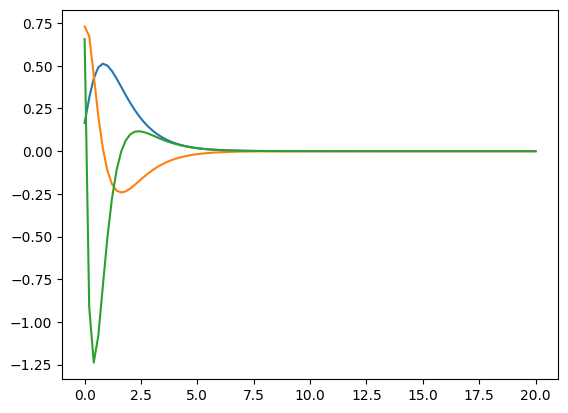

In [8]:
# Plot
def f(t, x):
    return np.dot(A+B*F,x)

t0, t1 = 0, 20                # start and end
t = np.linspace(t0, t1, 100)  # the points of evaluation of solution             
x0 = [np.random.uniform(-1, 1), np.random.uniform(-1, 1), np.random.uniform(-1, 1)] # initial value
#print(x0)
x = np.zeros((len(t), len(x0)))   # array for solution
x[0,:] = x0
r = integrate.ode(f).set_integrator("dopri5")  # choice of method
r.set_initial_value(x0, t0)   # initial values

for i in range(1, t.size):
   x[i, :] = r.integrate(t[i]) # get one more value, add it to the array
   if not r.successful():
       raise RuntimeError("Could not integrate")
plt.plot(t, x)
plt.show()